In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')
warnings.filterwarnings('ignore', category=FutureWarning, module='pandas')

In [33]:
df = pd.read_csv("diabetes.csv")

df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


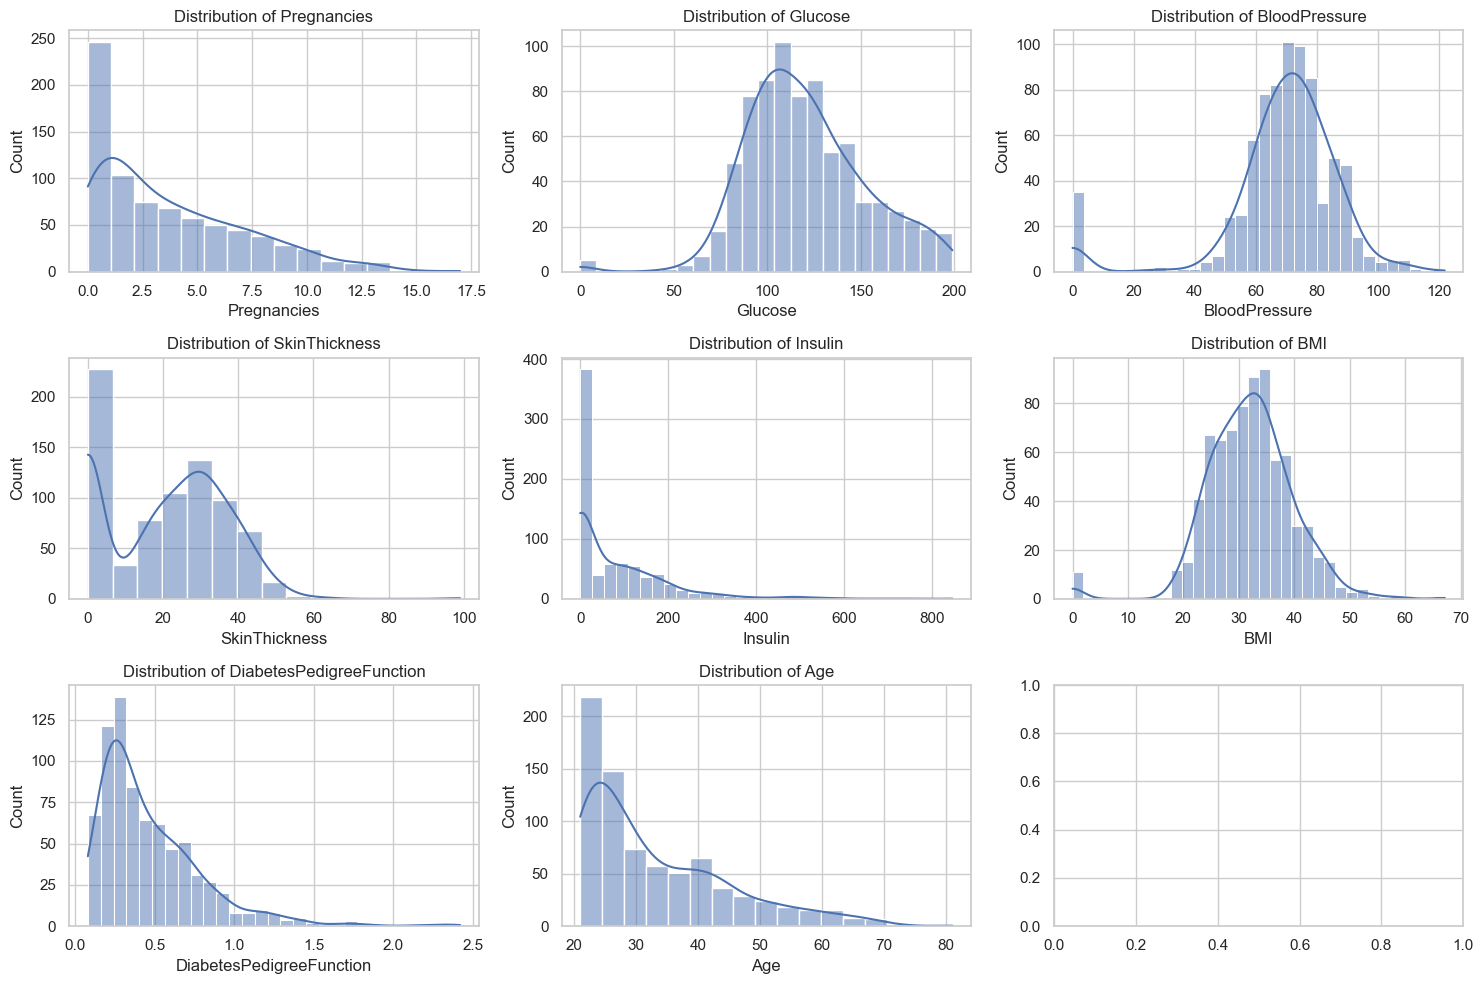

In [35]:
sns.set(style="whitegrid")

# Create a figure and axis for the subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the 2D axes array for easier indexing
axes = axes.flatten()

# Loop through each column (excluding the 'Outcome' column)
for i, column in enumerate(df.columns[:-1]):
    sns.histplot(data=df, x=column, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

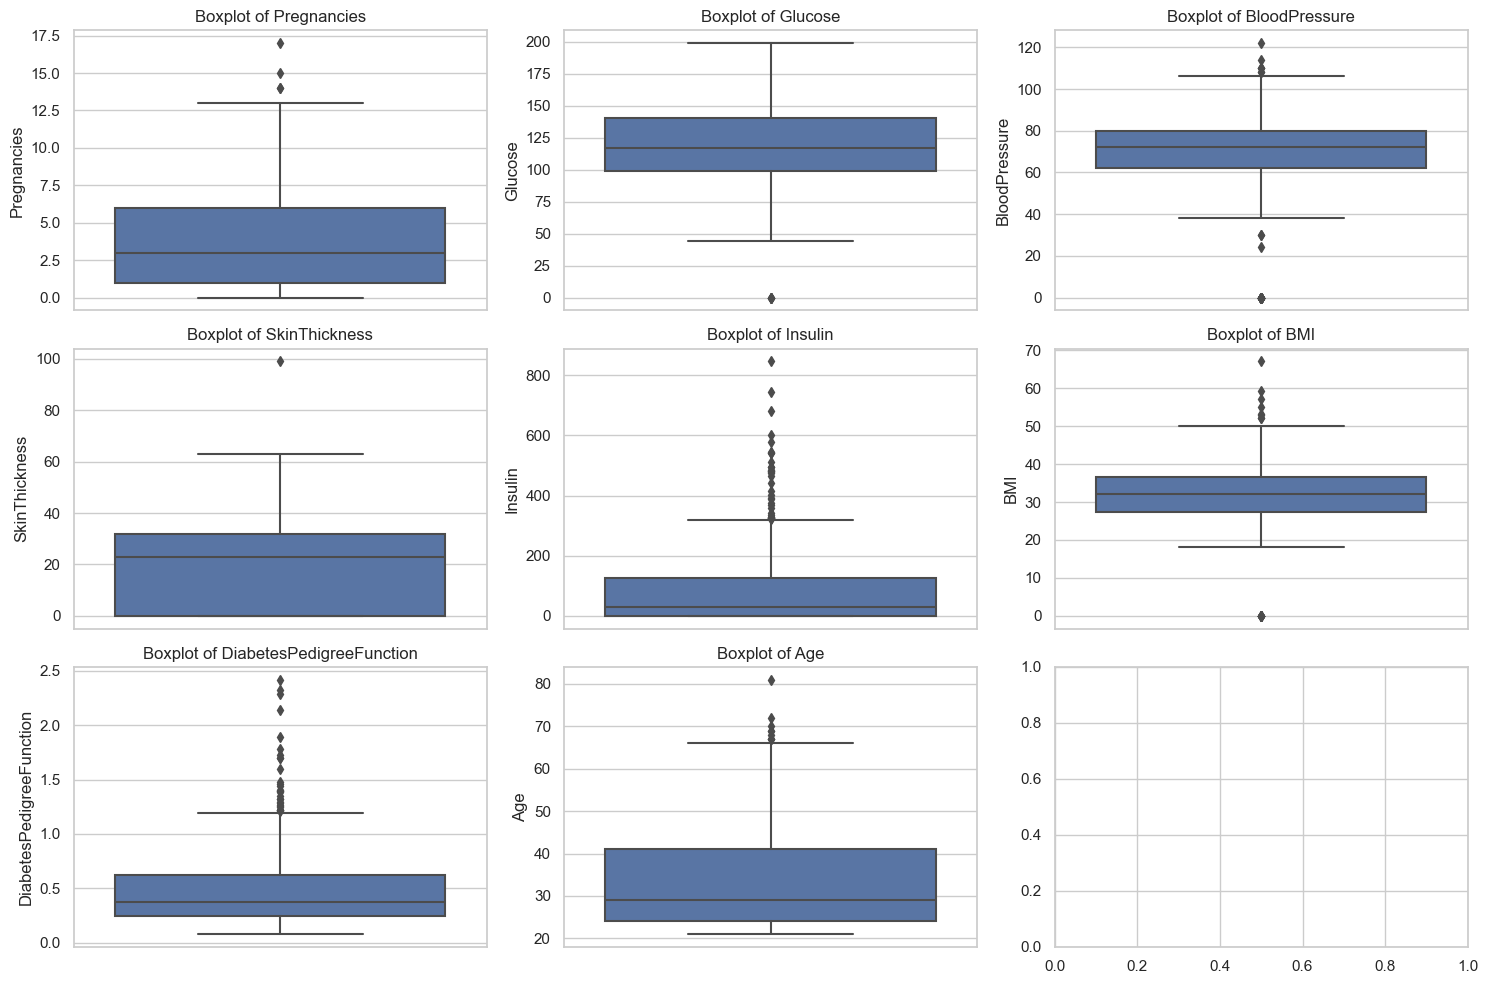

In [36]:
# Create a figure and axis for the subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the 2D axes array for easier indexing
axes = axes.flatten()   

# Loop through each column (excluding the 'Outcome' column)
for i, column in enumerate(df.columns):
    # Exclude the 'Outcome' column
    if column != 'Outcome':
        # Create a boxplot for the current column
        sns.boxplot(data=df, y=column, ax=axes[i])
        axes[i].set_title(f'Boxplot of {column}')
        
# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [37]:
df['BMI_to_Age_Ratio'] = df['BMI'] / df['Age']

In [38]:
# df['Insulin_Indicator'] = (df['Insulin'] > 0).astype(int)

In [39]:
df['Glucose'] = df[['Glucose', 'Insulin']].mean(axis=1)

In [40]:
# df['BP_BMI_Ratio'] = df['BloodPressure'] / df['BMI'].replace(0, np.nan)
# df['BP_BMI_Ratio'].fillna(0, inplace=True)
# df['BP_BMI_Ratio'].describe()

In [41]:
# Define the bins and labels for age categories
age_bins = [0, 12, 20, 30, 50, 100]
age_labels = ['Children', 'Teenagers', 'Young Adults', 'Middle-Aged', 'Senior Citizens']

# Create the 'Age_Category' feature
df['Age_Category'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

In [42]:
# Define the bins and labels for blood pressure categories
blood_pressure_bins = [0, 80, 89, 120, 130, 1000]
blood_pressure_labels = ['Low', 'Normal', 'Elevated', 'High Stage 1', 'High Stage 2']

# Create the 'BloodPressure_Category' feature
df['BloodPressure_Category'] = pd.cut(df['BloodPressure'], bins=blood_pressure_bins, labels=blood_pressure_labels)

In [43]:
bins = [0, 18.5, 24.9, 29.9, 34.9, 100]
labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obese (Class I)', 'Obese (Class II)']

df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels)

df['BMI_Category'] = df['BMI_Category'].cat.add_categories("Zero BMI")
df['BMI_Category'].fillna("Zero BMI", inplace=True)

In [44]:
# no

# # Define the bins and labels for glucose categories
# glucose_bins = [0, 100, 125, 150, 200, 1000]
# glucose_labels = ['Normal', 'Prediabetes', 'Mild Diabetes', 'Moderate Diabetes', 'Severe Diabetes']

# # Create the 'Glucose_Category' feature
# df['Glucose_Category'] = pd.cut(df['Glucose'], bins=glucose_bins, labels=glucose_labels)

In [45]:
# no

# # Define the bins and labels for skin thickness categories
# skin_thickness_bins = [0, 10, 20, 30, 40, 100]
# skin_thickness_labels = ['Very Thin', 'Thin', 'Moderate', 'Thick', 'Very Thick']

# # Create the 'SkinThickness_Category' feature
# df['SkinThickness_Category'] = pd.cut(df['SkinThickness'], bins=skin_thickness_bins, labels=skin_thickness_labels)

In [46]:
# Creating the one hot encode function
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first = True)        
    data = data.drop(column,axis = 1)
    data = data.join(encoded)
    return data

In [47]:
# Applying one hot encode on the categorical data
df = one_hot_encode(df, 'Age_Category')
df = one_hot_encode(df, 'BMI_Category')
df = one_hot_encode(df, 'BloodPressure_Category')
# df = one_hot_encode(df, 'SkinThickness_Category')
# df = one_hot_encode(df, 'Glucose_Category')


In [48]:
from sklearn.model_selection import train_test_split

X = df.drop(['Outcome', 'Pregnancies', 'SkinThickness'], axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
X

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,BMI_to_Age_Ratio,Teenagers,Young Adults,Middle-Aged,Senior Citizens,Normal Weight,Overweight,Obese (Class I),Obese (Class II),Zero BMI,Normal,Elevated,High Stage 1,High Stage 2
0,74.0,72,0,33.6,0.627,50,0.672000,False,False,True,False,False,False,True,False,False,False,False,False,False
1,42.5,66,0,26.6,0.351,31,0.858065,False,False,True,False,False,True,False,False,False,False,False,False,False
2,91.5,64,0,23.3,0.672,32,0.728125,False,False,True,False,True,False,False,False,False,False,False,False,False
3,91.5,66,94,28.1,0.167,21,1.338095,False,True,False,False,False,True,False,False,False,False,False,False,False
4,152.5,40,168,43.1,2.288,33,1.306061,False,False,True,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,140.5,76,180,32.9,0.171,63,0.522222,False,False,False,True,False,False,True,False,False,False,False,False,False
764,61.0,70,0,36.8,0.340,27,1.362963,False,True,False,False,False,False,False,True,False,False,False,False,False
765,116.5,72,112,26.2,0.245,30,0.873333,False,True,False,False,False,True,False,False,False,False,False,False,False
766,63.0,60,0,30.1,0.349,47,0.640426,False,False,True,False,False,False,True,False,False,False,False,False,False


In [50]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=0)

y_train_before = y_train

# Fit and apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)

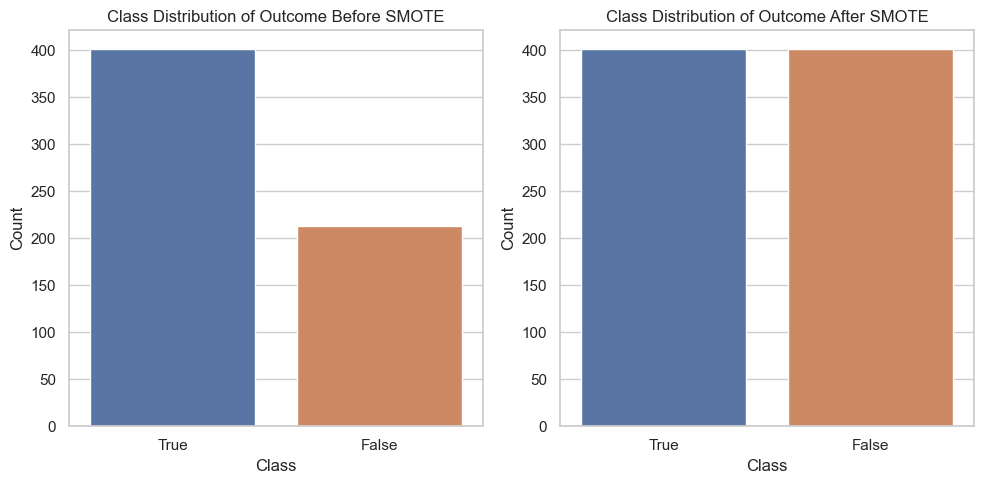

In [51]:
class_distribution_before = y_train_before.value_counts().sort_index()
class_distribution_after = y_train.value_counts().sort_index()

# Define class labels
class_labels = ['True', 'False']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot class distribution before SMOTE
sns.countplot(x=y_train_before, ax=axes[0])
axes[0].set_title('Class Distribution of Outcome Before SMOTE')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(class_labels)

# Plot class distribution after SMOTE
sns.countplot(x=y_train, ax=axes[1])
axes[1].set_title('Class Distribution of Outcome After SMOTE')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(class_labels)

plt.tight_layout()
plt.show()

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

param_grid = {
    'max_depth': [2, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'splitter': ['best', 'random'],
    # 'ccp_alpha': [0.0, 0.01, 0.1, 0.2, 0.5]
}

clf = DecisionTreeClassifier(random_state=0)

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print(best_params)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}


In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

param_grid = {
    'max_depth': [2, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'splitter': ['best', 'random'],
    # 'ccp_alpha': [0.0, 0.01, 0.1, 0.2, 0.5]
}

clf = DecisionTreeClassifier(random_state=0)

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print(best_params)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}


In [54]:
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']
best_min_criterion = best_params['criterion']
best_min_max_features = best_params['max_features']
best_min_splitter = best_params['splitter']

clf = DecisionTreeClassifier(random_state=0, criterion=best_min_criterion, max_depth=best_max_depth, 
                                                                  min_samples_split=best_min_samples_split, 
                                                                  min_samples_leaf=best_min_samples_leaf,
                                                                  max_features=best_min_max_features,
                                                                  splitter=best_min_splitter,
                                                                  ccp_alpha=0.01)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=10,
                       min_samples_split=10, random_state=0, splitter='random')

In [55]:
# from sklearn.feature_selection import RFE

# # Create an RFE object
# num_features_to_select = 10
# rfe = RFE(estimator=clf, n_features_to_select=num_features_to_select, step=1)

# # Fit the RFE model
# rfe.fit(X_train, y_train)

# # Get the selected features
# selected_features_mask = rfe.support_
# selected_features = X_train.columns[selected_features_mask]

# # Filter the training data based on selected features
# X_train_selected = X_train[selected_features]
# X_test_selected = X_test[selected_features]

# # Now, you can use X_train_selected for training your classifier
# clf.fit(X_train_selected, y_train)

In [56]:
# Access feature importances
feature_importances = clf.feature_importances_

# Print or visualize feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

Glucose: 0.0
BloodPressure: 0.0
Insulin: 0.0
BMI: 0.0
DiabetesPedigreeFunction: 0.0
Age: 0.03175937835940763
BMI_to_Age_Ratio: 0.0
Teenagers: 0.0
Young Adults: 0.10605228588488984
Middle-Aged: 0.3004572966381703
Senior Citizens: 0.19150204369931553
Normal Weight: 0.04429937897342403
Overweight: 0.0
Obese (Class I): 0.1932844523958
Obese (Class II): 0.1326451640489926
Zero BMI: 0.0
Normal: 0.0
Elevated: 0.0
High Stage 1: 0.0
High Stage 2: 0.0


In [57]:
y_preds = clf.predict(X_test)

In [58]:
print("Accuracy %.4f" % accuracy_score(y_test, y_preds))
print("Precision %.4f" % precision_score(y_test, y_preds))
print("Recall %.4f" % recall_score(y_test, y_preds))
print("F1 %.4f" % f1_score(y_test, y_preds))

Accuracy 0.6623
Precision 0.5238
Recall 0.6000
F1 0.5593


In [60]:
from sklearn.tree import export_graphviz
import graphviz
# Visualize the decision tree (partial view)
dot_data = export_graphviz(
    clf, out_file=None, 
    feature_names=list(X_test.columns),
    class_names=['No Diabetes', 'Diabetes'],
    filled=True, rounded=True, special_characters=True
)

# Create a Graphviz graph from the DOT data and display it (you may need to adjust the view)
graph = graphviz.Source(dot_data)
graph.view("decision_tree")  # This will save and open the visualization as "decision_tree.pdf"

'decision_tree.pdf'

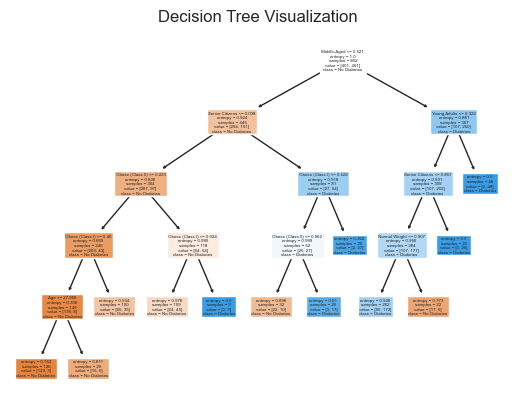

In [61]:

# Use the plot_tree function with adjusted parameters
plot_tree(clf,
          feature_names=list(X.columns),
          class_names=['No Diabetes', 'Diabetes'],
          filled=True,
          )

# Add a title
plt.title("Decision Tree Visualization")

# Show the plot
plt.show()

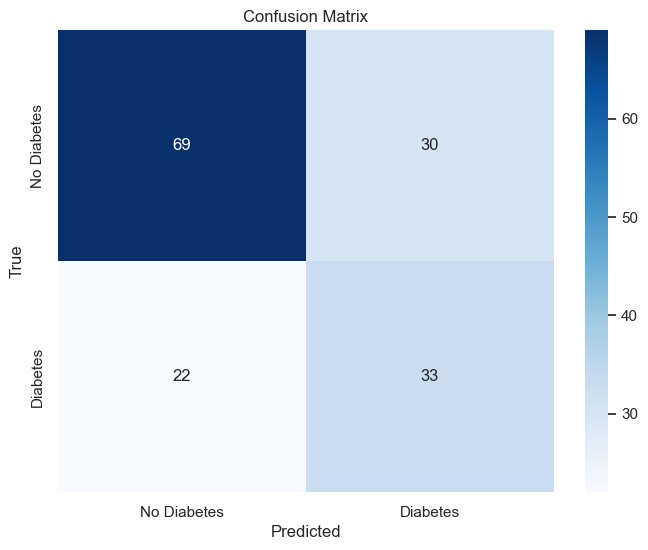

In [62]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_preds)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

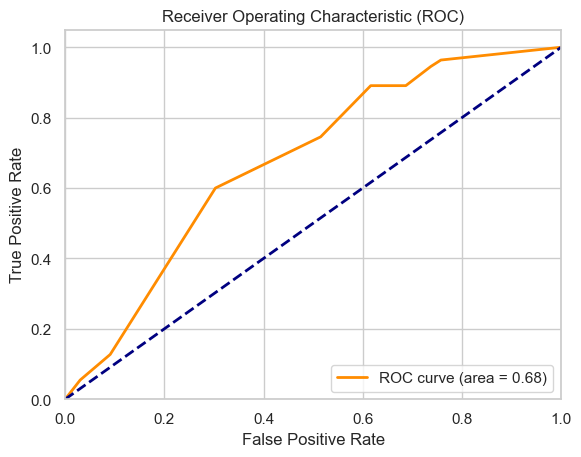

In [63]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()